In [44]:
import pandas as pd
import matplotlib.pyplot as plt

In [45]:
df = pd.read_csv("BMW_sales.csv", encoding="UTF-8")
df.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low


In [46]:
# convert columns to correct types
df["Sales_Volume"] = pd.to_numeric(df["Sales_Volume"], errors="coerce")
df["Year"] = pd.to_numeric(df["Year"], errors="coerce")
df["Price_USD"] = pd.to_numeric(df["Price_USD"], errors="coerce")

# cleaning data
df = df.dropna()

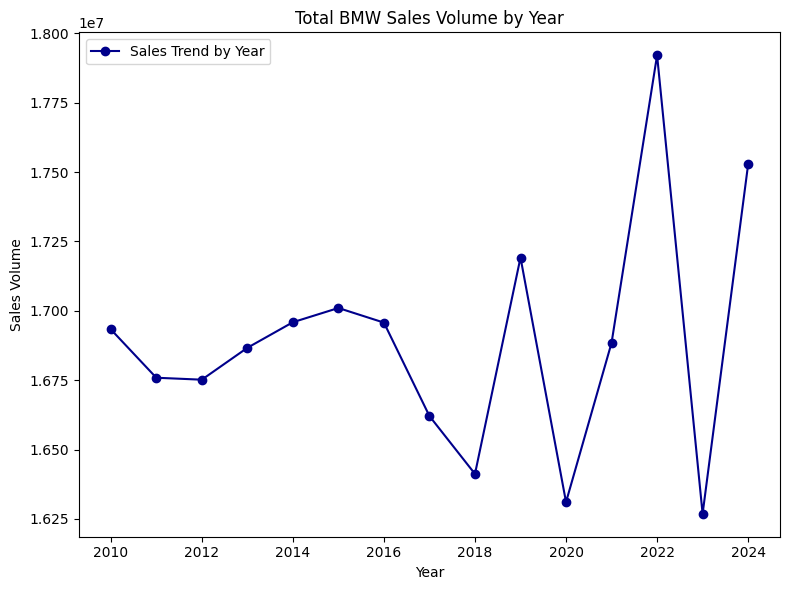

In [47]:
sales_by_year = df.groupby("Year")["Sales_Volume"].sum()
plt.figure(figsize=(8, 6))
plt.plot(sales_by_year.index, sales_by_year.values, marker='o', color="darkblue", label="Sales Trend by Year")
plt.legend(loc="upper left")
plt.title("Total BMW Sales Volume by Year")
plt.xlabel("Year")
plt.ylabel("Sales Volume")
plt.tight_layout()
plt.show()

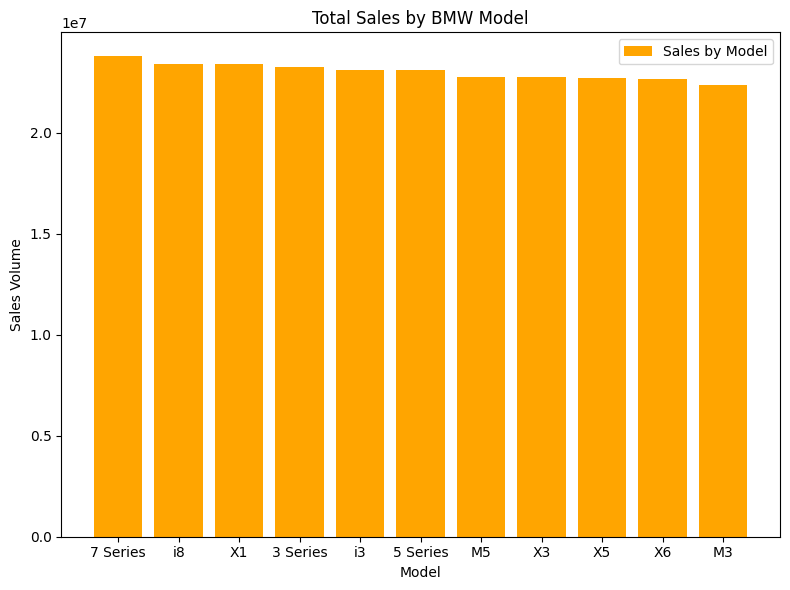

In [48]:
# sales by model -> Bar Chart
sales_by_model = df.groupby("Model")["Sales_Volume"].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 6))
plt.bar(sales_by_model.index, sales_by_model.values, color="orange", label="Sales by Model")
plt.title("Total Sales by BMW Model")
plt.xlabel("Model")
plt.ylabel("Sales Volume")
plt.legend()
plt.tight_layout()
plt.show()

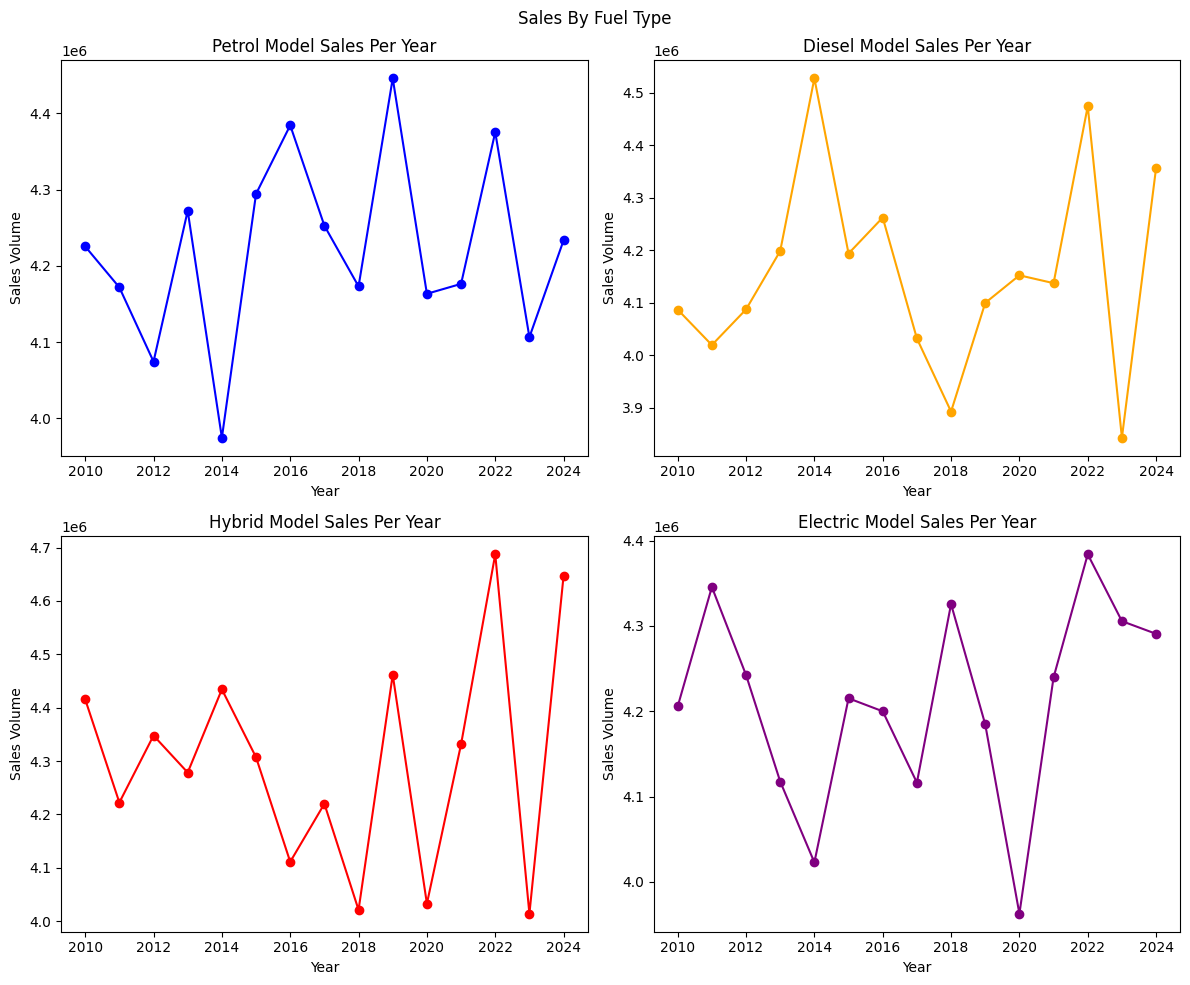

In [49]:
fuel_by_year = df.groupby(["Year", "Fuel_Type"])["Sales_Volume"].sum().unstack().fillna(0)

fig, ax = plt.subplots(2, 2, figsize=(12, 10))

ax[0, 0].plot(fuel_by_year.index, fuel_by_year["Petrol"], color="blue", marker="o")
ax[0, 0].set_title("Petrol Model Sales Per Year")
ax[0, 0].set_xlabel("Year")
ax[0, 0].set_ylabel("Sales Volume")

ax[0, 1].plot(fuel_by_year.index, fuel_by_year["Diesel"], color="orange", marker="o")
ax[0, 1].set_title("Diesel Model Sales Per Year")
ax[0, 1].set_xlabel("Year")
ax[0, 1].set_ylabel("Sales Volume")

ax[1, 0].plot(fuel_by_year.index, fuel_by_year["Hybrid"], color="red", marker="o")
ax[1, 0].set_title("Hybrid Model Sales Per Year")
ax[1, 0].set_xlabel("Year")
ax[1, 0].set_ylabel("Sales Volume")

ax[1, 1].plot(fuel_by_year.index, fuel_by_year["Electric"], color="purple", marker="o")
ax[1, 1].set_title("Electric Model Sales Per Year")
ax[1, 1].set_xlabel("Year")
ax[1, 1].set_ylabel("Sales Volume")

plt.suptitle("Sales By Fuel Type")
plt.tight_layout()
plt.show()

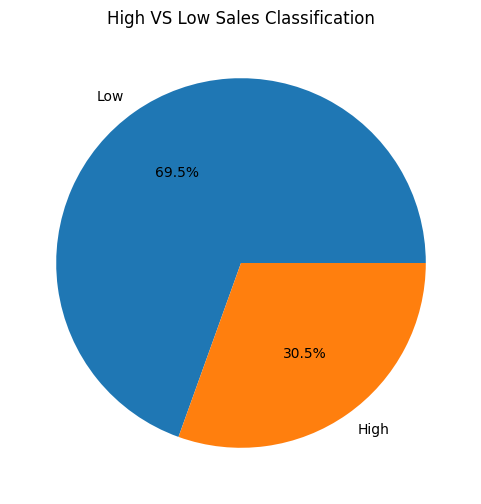

In [50]:
# High vs Low sales Classification
classification_counts = df["Sales_Classification"].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(classification_counts, labels=classification_counts.index, autopct="%1.1f%%")
plt.title("High VS Low Sales Classification")
plt.show()

In [51]:
# creating a revenue column using the correct price column
df["Revenue"] = df["Price_USD"] * df["Sales_Volume"]
df.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification,Revenue
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High,819542000
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low,271562732
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low,792175410
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low,246749637
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low,153685840


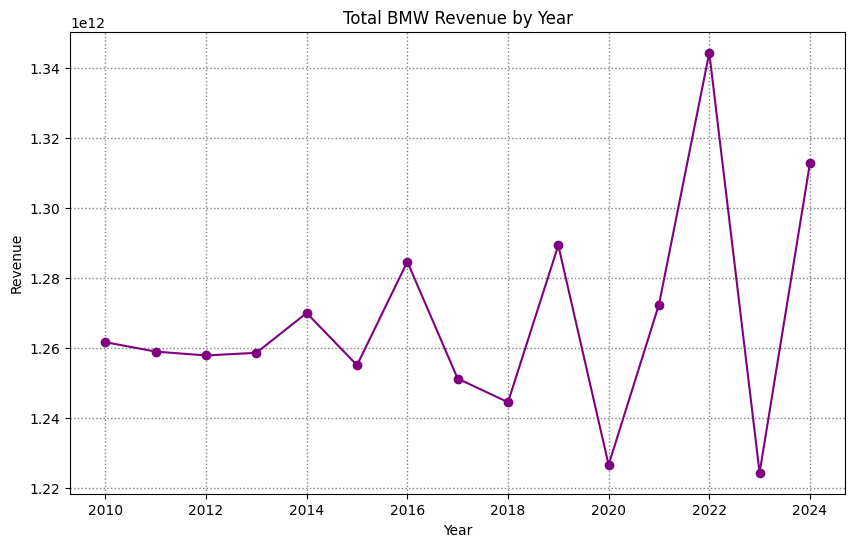

In [52]:
revenue_by_year = df.groupby("Year")["Revenue"].sum()

plt.figure(figsize=(10, 6))
plt.plot(revenue_by_year.index, revenue_by_year.values, marker="o", color="purple", linestyle="-")
plt.title("Total BMW Revenue by Year")
plt.xlabel("Year")
plt.ylabel("Revenue")
plt.grid(color="gray", linestyle=':', linewidth=1)
plt.show()